<a href="https://colab.research.google.com/github/deathreaper17/C-Plus-Plus/blob/master/Citrus_plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
from keras.applications.imagenet_utils import decode_predictions
import keras
import tensorflow as tf
import numpy as np
from keras.layers import Dense, Flatten
from keras.models import Sequential
import os
import matplotlib.pyplot as plt
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
#from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
#from keras.applications.resnet import ResNet, preprocess_input,decode_predictions
from keras.preprocessing.image import ImageDataGenerator , img_to_array,load_img

In [202]:
train_path='/content/drive/MyDrive/dataset_citrus_plant_insternshjip]/Citrus'
valid_path='/content/drive/MyDrive/dataset_citrus_plant_insternshjip]/Citrus'

In [203]:
len(os.listdir("/content/drive/MyDrive/dataset_citrus_plant_insternshjip]/Citrus"))

2

In [227]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=(preprocess_input),
    rotation_range = 30,
   shear_range = 0.2,
    zoom_range = 0.2,
      horizontal_flip = True,
   #fill_mode = 'nearest',
    validation_split = 0.2
)

val_datagen = ImageDataGenerator(
    preprocessing_function=(preprocess_input)
)

In [229]:
train= train_datagen.flow_from_directory(directory="/content/drive/MyDrive/dataset_citrus_plant_insternshjip]/Citrus",target_size=(256,256),batch_size=32)
val = valid_datagen.flow_from_directory(directory="/content/drive/MyDrive/dataset_citrus_plant_insternshjip]/Citrus",target_size=(256,256),batch_size=32)


Found 759 images belonging to 2 classes.
Found 759 images belonging to 2 classes.


In [230]:
t_img , label=train.next()

In [231]:
t_img.shape

(32, 256, 256, 3)

In [232]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/180)
    plt.show()

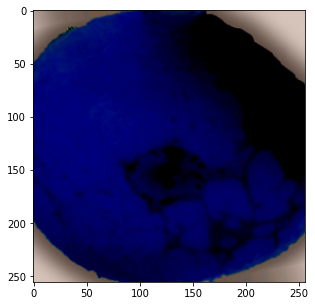

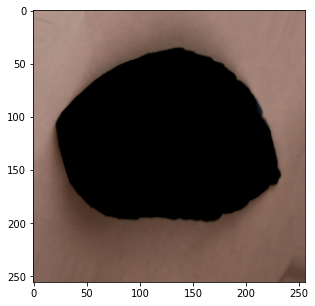

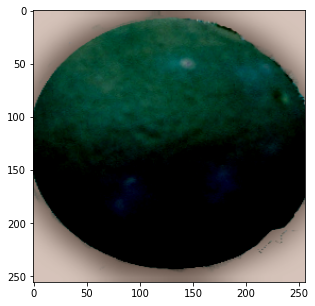

In [233]:
plotImage(t_img[:3],label[:3])

Building MODel


In [210]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [211]:
model1=VGG19(input_shape=(256,256,3),include_top=False)

In [212]:
for layer in model1.layers:
  layer.trainable=False

In [213]:
model1.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [214]:
from keras import activations
X=Flatten()(model1.output)
X=Dense(units=2, activation="softmax")(X)


In [215]:
model2=Model(model1.input,X)

In [216]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [217]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=["accuracy"])

In [234]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
#es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
#model check point
mc=ModelCheckpoint(filepath="best_model.h5",
                     monitor='val_accuracy',
                     min_delta=0.01,
                    patience=3,
                    verbose=1,
                     save_best_only=True)
cb=[mc]

In [ ]:
his =model.fit_generator(train,
                        steps_per_epoch=16,
                         epochs=50,
                         verbose=1,
                         callbacks=cb,
                         validation_data=val,
                         validation_steps=16
                         )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 0.1792 - accuracy: 0.9960
Epoch 1: val_accuracy improved from -inf to 0.99219, saving model to best_model.h5
16/16 [==============================] - 15s 968ms/step - loss: 0.1792 - accuracy: 0.9960 - val_loss: 0.1799 - val_accuracy: 0.9922
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 0.1938 - accuracy: 0.9961
Epoch 2: val_accuracy improved from 0.99219 to 0.99805, saving model to best_model.h5
16/16 [==============================] - 15s 959ms/step - loss: 0.1938 - accuracy: 0.9961 - val_loss: 0.0093 - val_accuracy: 0.9980
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9980    
Epoch 3: val_accuracy did not improve from 0.99805
16/16 [==============================] - 15s 966ms/step - loss: 0.0427 - accuracy: 0.9980 - val_loss: 0.0208 - val_accuracy: 0.9980
Epoch 4/50
 7/16 [============>.................] - ETA: 5s - loss: 0.0000e+00 - accuracy: 1.0000

In [220]:
h=his.history

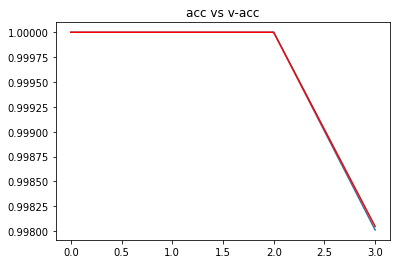

In [221]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

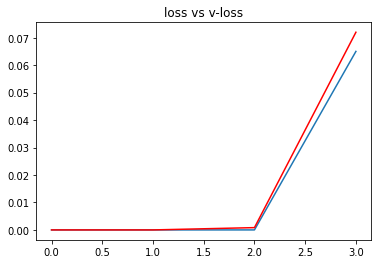

In [222]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()